In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

### Trying read a file

In [7]:
def readdata(filename):
    data = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                data += line.rstrip()
    return data
data = readdata('nd2.fasta')
data[:50]

'TTATTAATGAACCCCTACGCCAAACTAACATTCTCCCTAAGCCTTGCACT'

### Trying counting the data

In [8]:
len(data)

132969

In [9]:
import collections
collections.Counter(data)

Counter({'A': 41549,
         'C': 44952,
         'G': 13790,
         'M': 1,
         'R': 5,
         'T': 32663,
         'Y': 9})

In [11]:
def count_kmers(seq, k):
    counts = {}
    for i in range(len(seq) - k + 1):
        kmer = seq[i:i+k]
        if kmer not in counts:
            counts[kmer] = 0
        counts[kmer] += 1
    return counts

In [12]:
seq = 'TAATGACCCCT'

In [14]:
counts = count_kmers(seq, 3)

In [15]:
print(counts)
print(len(counts))

{'TAA': 1, 'AAT': 1, 'ATG': 1, 'TGA': 1, 'GAC': 1, 'ACC': 1, 'CCC': 2, 'CCT': 1}
8


In [16]:
counts = count_kmers(seq, 4)
print(counts)
print(len(counts))

{'TAAT': 1, 'AATG': 1, 'ATGA': 1, 'TGAC': 1, 'GACC': 1, 'ACCC': 1, 'CCCC': 1, 'CCCT': 1}
8


### Trying bar plot

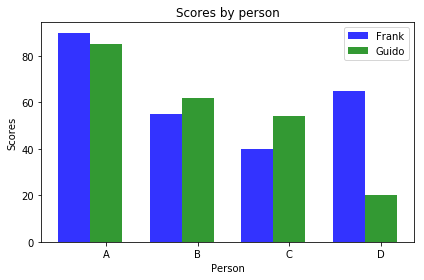

In [17]:
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()